<a href="https://colab.research.google.com/github/ConeDeveloper/DataScience-1---CoderHouse/blob/main/ProyectoParteIII_Perez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final**

## **Objetivo:**

El objetivo de este trabajo es analizar el comportamiento del mercado inmobiliario a partir de un dataset extraído de un portal de propiedades en venta. A través del estudio de variables como tipo de propiedad, ubicación, características del inmueble y métricas de rendimiento publicitario (impresiones, visitas y leads), se busca identificar patrones de comportamiento que permitan optimizar la conversión de publicaciones, entender el impacto de la visibilidad en los resultados y evaluar el interés del público según diferentes atributos del inmueble.

## **Preguntas para formular Hipótesis:**

1) Relación entre el tipo de propiedad y el número de visitas/leads

¿Las casas generan más visitas que los departamentos o terrenos? ¿Los desarrollos tienen más leads que los avisos regulares?

2)Impacto del destaque en la conversión

¿Los avisos "Super Destacado" tienen más visitas y leads que los anuncios normales? ¿El tipo de destaque tiene impacto en el cierre de ventas?

3)Análisis de precios según ubicación

¿Cuál es la diferencia de precios entre propiedades en Rosario y Funes? ¿Existen zonas con un mayor valor promedio por metro cuadrado?

4)Eficiencia de la publicidad

¿Existe una correlación entre impresiones y leads? ¿Las propiedades con más visitas convierten en más leads?

5)Tamaño de la propiedad y su impacto en el interés

¿Las propiedades más grandes generan más leads? ¿Las propiedades con más habitaciones son más buscadas?

## **Hipótesis**

1) Relación entre el tipo de propiedad y el número de visitas/leads

Hipótesis 1:

Las casas en venta reciben, en promedio, más visitas y generan más leads que los departamentos o terrenos. Asimismo, los desarrollos inmobiliarios generan un mayor número de leads en comparación con los avisos tradicionales.

2) Impacto del destaque en la conversión

Hipótesis 2:

Los avisos con categoría "Super Destacado" obtienen significativamente más visitas y leads que aquellos sin destaque, lo que sugiere que el tipo de promoción influye en la conversión del anuncio.

3) Análisis de precios según ubicación

Hipótesis 3:

Las propiedades ubicadas en Funes tienen un valor promedio por metro cuadrado más alto que las propiedades ubicadas en Rosario, evidenciando una diferencia significativa en el precio según la zona geográfica.

4) Eficiencia de la publicidad

Hipótesis 4:

Existe una correlación positiva entre el número de impresiones y la cantidad de leads generados. A mayor visibilidad del aviso, mayor es la probabilidad de conversión.

5) Tamaño de la propiedad y su impacto en el interés

Hipótesis 5:

Las propiedades con mayor superficie total y más ambientes generan un mayor número de leads, ya que los usuarios tienden a mostrar mayor interés por inmuebles amplios.

## **Problema**

Determinar qué factores influyen en la generación de leads y construir un modelo predictivo para optimizar estrategias de marketing inmobiliario.

## **Contexto Analítico**

El dataset contiene información de propiedades en venta (Crestale Propiedades S.A.), con variables como precio, tipo de propiedad, ubicación y métricas de publicidad (impresiones, visitas, leads). Se aplicará un análisis supervisado para predecir leads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/ConeDeveloper/DataScience-1---CoderHouse/main/Dataset_Crestale.csv"
df = pd.read_csv(url)

In [3]:
# Mostrar primeras filas
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
              Nombre cliente aviso_padre     IDaviso Provincia   Ciudad  \
0  CRESTALE PROPIEDADES S.A.          SI  47830855.0  Santa Fe    Funes   
1  CRESTALE PROPIEDADES S.A.          SI  51749823.0  Santa Fe  Rosario   
2  CRESTALE PROPIEDADES S.A.          SI  53171223.0  Santa Fe  Rosario   
3  CRESTALE PROPIEDADES S.A.          SI  53186241.0  Santa Fe  Rosario   
4  CRESTALE PROPIEDADES S.A.          NO  53186242.0  Santa Fe  Rosario   

  Zona/colonia Zona aviso Tipo de operación Tipo de propiedad Tipo de aviso  \
0      Zona 10   Kentucky             Venta          Terrenos        Avisos   
1      Alberdi        NaN             Venta              Casa        Avisos   
2      Alberdi        NaN             Venta       Apartamento        Avisos   
3      Alberdi        NaN             Venta          Vertical   Desarrollos   
4      Alberdi        NaN             Venta       Apartamento   Desarrollos   

          Destaque Moneda    Precio  Mt2 total

In [4]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
            IDaviso    Mt2 totales    Ambientes  Habitaciones      Visitas  \
count  5.475000e+03    5475.000000  4999.000000   5473.000000  5476.000000   
mean   5.381782e+07     383.865571     2.153631      4.045313     5.716188   
std    1.438612e+06    8195.192591     1.588399    191.032237    19.467338   
min    4.783086e+07       0.000000     0.000000      0.000000     0.000000   
25%    5.318788e+07      36.000000     1.000000      0.000000     0.000000   
50%    5.426592e+07      61.000000     2.000000      1.000000     0.000000   
75%    5.478853e+07     110.000000     3.000000      2.000000     2.000000   
max    5.545667e+07  497600.000000    26.000000  14133.000000   692.000000   

            Leads  
count  296.000000  
mean     3.787162  
std     36.526080  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max    627.000000  


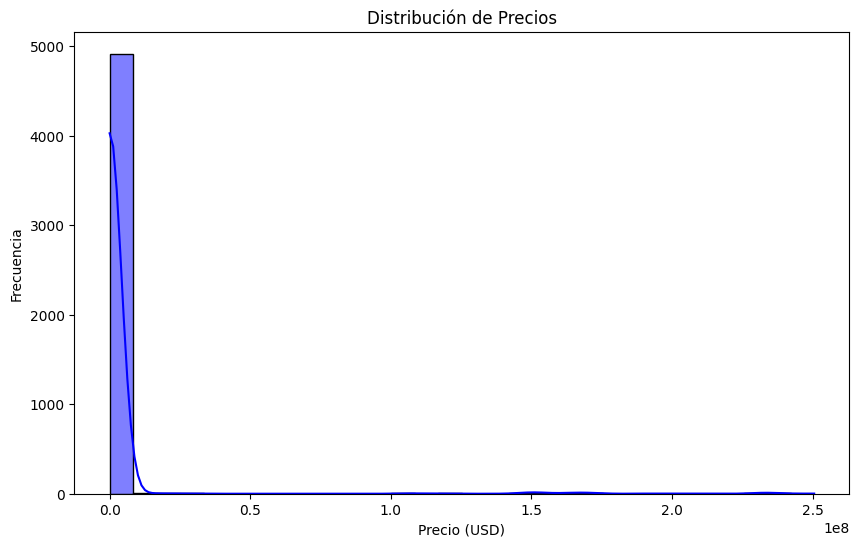

In [7]:
# Histograma de Precio
plt.figure(figsize=(10, 6))
# Reemplazar '$', ',' y '.' (como separador de miles), luego convertir a float
sns.histplot(df['Precio'].replace({'\$': '', ',': '', '\.': ''}, regex=True).replace('', np.nan).astype(float).dropna(), bins=30, kde=True, color='blue')
plt.title('Distribución de Precios')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

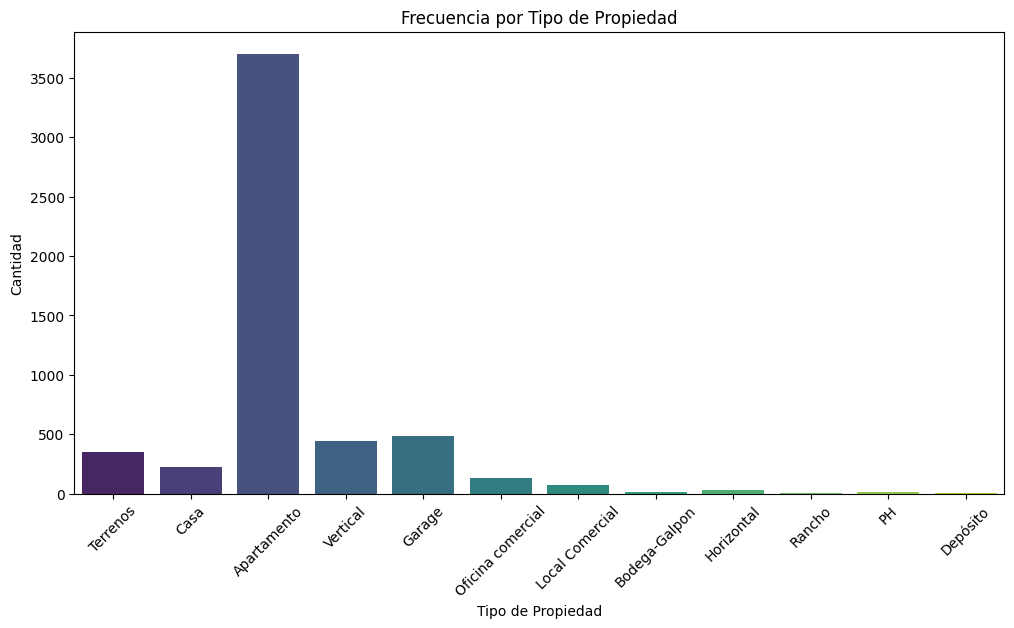

In [8]:
# Gráfico de barras: Frecuencia por Tipo de Propiedad
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Tipo de propiedad', palette='viridis')
plt.title('Frecuencia por Tipo de Propiedad')
plt.xticks(rotation=45)
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.show()

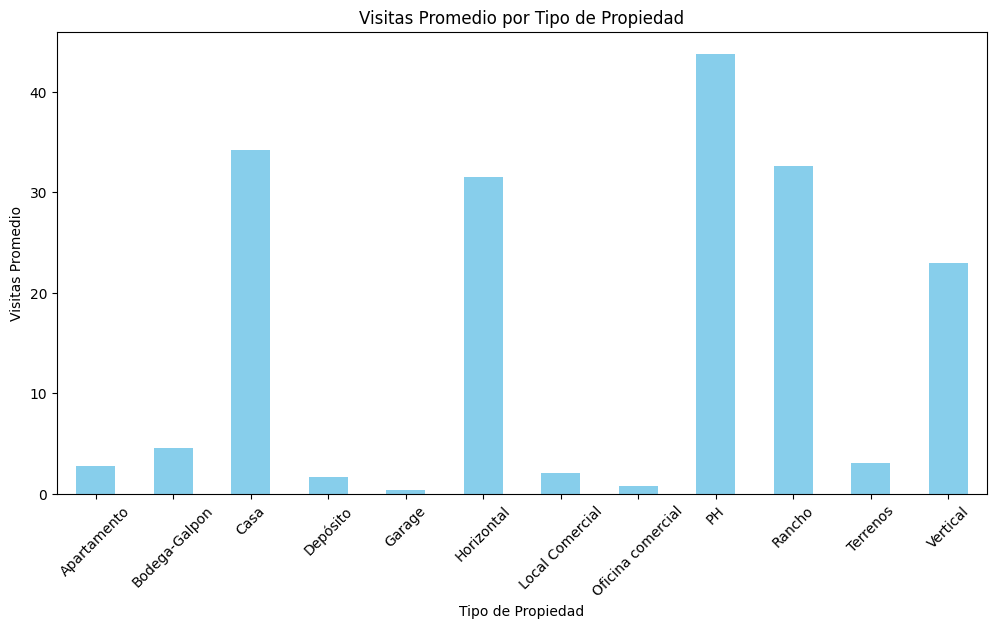

In [9]:
# Gráfico de barras: Visitas promedio por Tipo de Propiedad
visitas_prop = df.groupby('Tipo de propiedad')['Visitas'].mean()
plt.figure(figsize=(12, 6))
visitas_prop.plot(kind='bar', color='skyblue')
plt.title('Visitas Promedio por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Visitas Promedio')
plt.xticks(rotation=45)
plt.show()

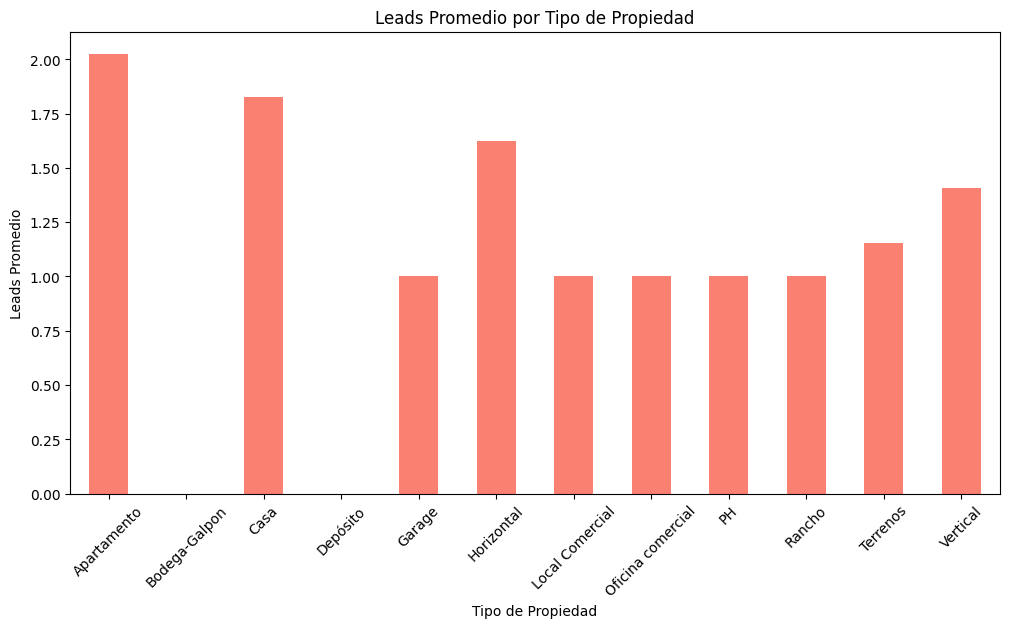

In [10]:
# Gráfico de barras: Leads promedio por Tipo de Propiedad
leads_prop = df.groupby('Tipo de propiedad')['Leads'].mean()
plt.figure(figsize=(12, 6))
leads_prop.plot(kind='bar', color='salmon')
plt.title('Leads Promedio por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Leads Promedio')
plt.xticks(rotation=45)
plt.show()


# Análisis de Outliers
Valores atípicos en Precio: 275 registros


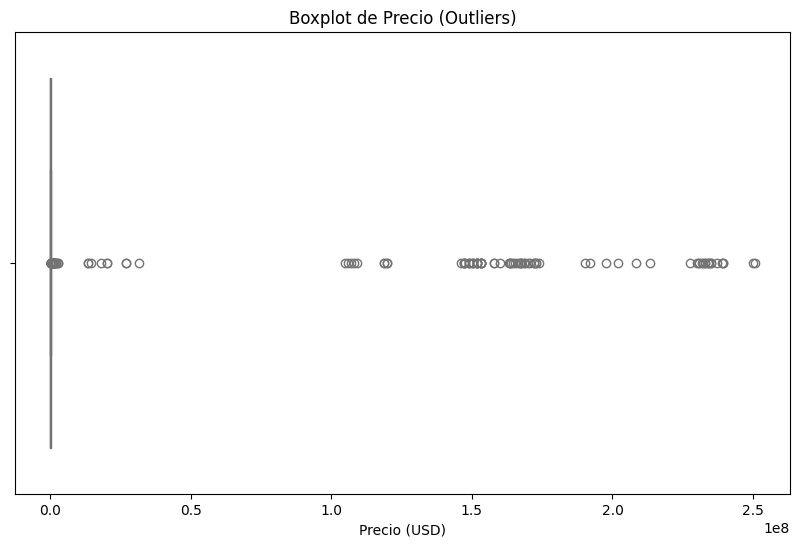

In [12]:
# --- Análisis de Outliers ---
print("\n# Análisis de Outliers")
# Reemplazar '$', ',' y '.' (como separador de miles), luego convertir a float
df['Precio'] = df['Precio'].replace({'\$': '', ',': '', '\.': ''}, regex=True).replace('', np.nan).astype(float)
Q1 = df['Precio'].quantile(0.25)
Q3 = df['Precio'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Precio'] < (Q1 - 1.5 * IQR)) | (df['Precio'] > (Q3 + 1.5 * IQR))]
print(f"Valores atípicos en Precio: {len(outliers)} registros")

# Boxplot de Precio
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Precio'].dropna(), color='lightgreen')
plt.title('Boxplot de Precio (Outliers)')
plt.xlabel('Precio (USD)')
plt.show()

In [14]:
# --- Análisis de Datos Nulos ---
print("\n# Análisis de Datos Nulos")
print("Valores nulos por columna:")
print(df.isnull().sum())


# Análisis de Datos Nulos
Valores nulos por columna:
Nombre cliente        5383
aviso_padre           5383
 IDaviso              5383
Provincia             5383
Ciudad                5383
Zona/colonia          5383
Zona aviso            8875
Tipo de operación     5383
Tipo de propiedad     5383
Tipo de aviso         5383
Destaque              5383
Moneda                5857
Precio                5857
Mt2 totales           5383
Ambientes             5859
Habitaciones          5385
Impresiones           5382
Visitas               5382
Leads                10562
Calidad               5383
dtype: int64



# Preprocesamiento de Datos
Columnas disponibles en df: ['Nombre cliente', 'aviso_padre', ' IDaviso', 'Provincia', 'Ciudad', 'Zona/colonia', 'Zona aviso', 'Tipo de operación', 'Tipo de aviso', 'Moneda', 'Precio', 'Mt2 totales', 'Ambientes', 'Habitaciones', 'Impresiones', 'Visitas', 'Leads', 'Calidad', 'Tipo de propiedad_Bodega-Galpon', 'Tipo de propiedad_Casa', 'Tipo de propiedad_Depósito', 'Tipo de propiedad_Garage', 'Tipo de propiedad_Horizontal', 'Tipo de propiedad_Local Comercial', 'Tipo de propiedad_Oficina comercial', 'Tipo de propiedad_PH', 'Tipo de propiedad_Rancho', 'Tipo de propiedad_Terrenos', 'Tipo de propiedad_Vertical', 'Destaque_Super Destacado']
Advertencia: Ninguna de las columnas categóricas especificadas está presente en el dataset.
NaN en X antes de dividir: 0
NaN en X_train_scaled: 0
Inf en X_train_scaled: 0

# Modelo de Regresión Lineal
MSE: 0.12, R²: -0.54

# Modelo Random Forest
MSE: 0.07, R²: 0.11

# Modelo Gradient Boosting
MSE: 0.06, R²: 0.22

# Evaluación d

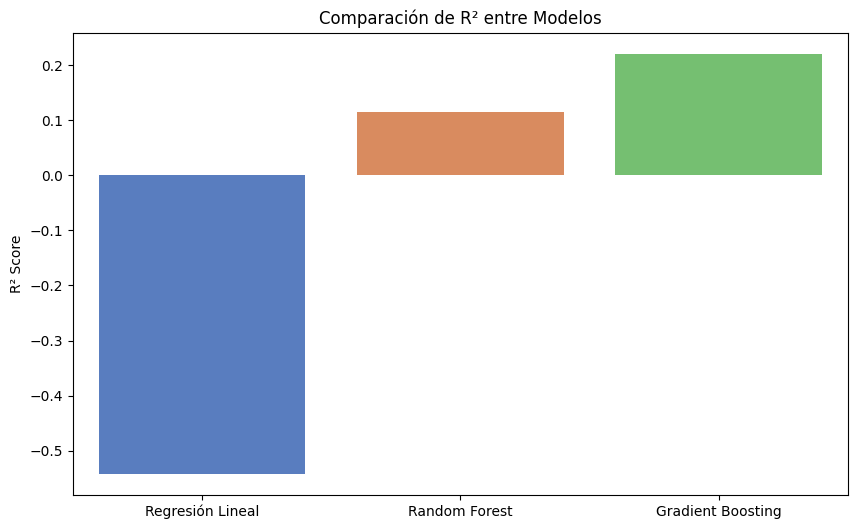

In [33]:
# --- Preprocesamiento de Datos ---
print("\n# Preprocesamiento de Datos")
df['Visitas'] = df['Visitas'].replace({'\.': '', '': 0}, regex=True).fillna(0).astype(int)
df['Leads'] = df['Leads'].replace({'\.': '', '': 0}, regex=True).fillna(0).astype(int)
df['Impresiones'] = df['Impresiones'].replace({'\.': '', '': 0}, regex=True).fillna(0).astype(int)
df['Ambientes'] = df['Ambientes'].replace({'\.': '', '': 0}, regex=True).fillna(0).astype(int)
df['Habitaciones'] = df['Habitaciones'].replace({'\.': '', '': 0}, regex=True).fillna(0).astype(int)
df['Precio'] = df['Precio'].replace({'\$': '', ',': '', '\.': ''}, regex=True).replace('', np.nan).astype(float).fillna(df['Precio'].median())
df['Mt2 totales'] = df['Mt2 totales'].replace('', np.nan).astype(float).fillna(df['Mt2 totales'].median())

# Verificar columnas disponibles
print("Columnas disponibles en df:", df.columns.tolist())

# Variables categóricas a numéricas (dummy encoding)
categorical_cols = ['Tipo de propiedad', 'Destaque']
available_cols = [col for col in categorical_cols if col in df.columns]
if len(available_cols) == 0:
    print("Advertencia: Ninguna de las columnas categóricas especificadas está presente en el dataset.")
else:
    df = pd.get_dummies(df, columns=available_cols, drop_first=True)

# Seleccionar características y objetivo
X = df[['Precio', 'Mt2 totales', 'Ambientes', 'Habitaciones', 'Impresiones', 'Visitas'] +
       [col for col in df.columns if 'Tipo de propiedad_' in col or 'Destaque_' in col]]
y = df['Leads']

# Rellenar cualquier NaN restante en X con 0
X = X.fillna(0)

# Verificar NaN en X antes de dividir
print("NaN en X antes de dividir:", X.isnull().sum().sum())

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar NaN o inf en los datos escalados
print("NaN en X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Inf en X_train_scaled:", np.isinf(X_train_scaled).sum())

# --- Modelo de Regresión Lineal ---
print("\n# Modelo de Regresión Lineal")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Métricas
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"MSE: {lr_mse:.2f}, R²: {lr_r2:.2f}")

# --- Modelo Random Forest ---
print("\n# Modelo Random Forest")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Métricas
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")

# --- Modelo Gradient Boosting ---
print("\n# Modelo Gradient Boosting")
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)

# Métricas
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print(f"MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}")

# --- Evaluación del Rendimiento de Modelos ---
print("\n# Evaluación del Rendimiento de Modelos")
print(f"Regresión Lineal - MSE: {lr_mse:.2f}, R²: {lr_r2:.2f}")
print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")
print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}")

# Gráfico comparativo de R²
models = ['Regresión Lineal', 'Random Forest', 'Gradient Boosting']
r2_scores = [lr_r2, rf_r2, gb_r2]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores, palette='muted')
plt.title('Comparación de R² entre Modelos')
plt.ylabel('R² Score')
plt.show()



# Visualizaciones de Predicciones


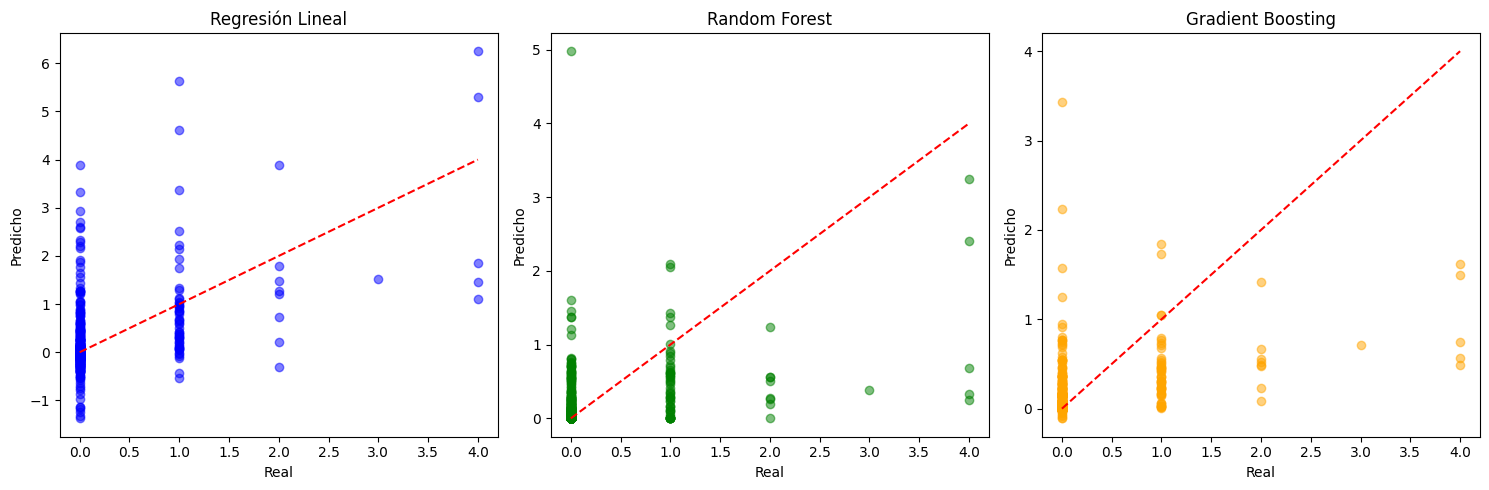

In [34]:
# --- Visualizaciones de Predicciones ---
print("\n# Visualizaciones de Predicciones")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Regresión Lineal')
plt.xlabel('Real')
plt.ylabel('Predicho')

plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest')
plt.xlabel('Real')
plt.ylabel('Predicho')

plt.subplot(1, 3, 3)
plt.scatter(y_test, gb_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Gradient Boosting')
plt.xlabel('Real')
plt.ylabel('Predicho')

plt.tight_layout()
plt.show()

In [35]:
# --- Ajuste de Datos ---
print("\n# Ajuste de Datos")
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Características seleccionadas: {selected_features}")


# Ajuste de Datos
Características seleccionadas: ['Ambientes', 'Habitaciones', 'Impresiones', 'Visitas', 'Tipo de propiedad_Vertical']


In [36]:
# --- Entrenamiento con Modelos ya Ajustados ---
print("\n# Entrenamiento con Modelos ya Ajustados")
lr_model.fit(X_train_selected, y_train)
rf_model.fit(X_train_selected, y_train)
gb_model.fit(X_train_selected, y_train)

lr_pred_adj = lr_model.predict(X_test_selected)
rf_pred_adj = rf_model.predict(X_test_selected)
gb_pred_adj = gb_model.predict(X_test_selected)


# Entrenamiento con Modelos ya Ajustados


In [37]:
# --- Random Forest con Grid Search ---
print("\n# Random Forest con Grid Search")
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5)
rf_grid.fit(X_train_selected, y_train)
rf_best = rf_grid.best_estimator_
rf_pred_grid = rf_best.predict(X_test_selected)
rf_grid_mse = mean_squared_error(y_test, rf_pred_grid)
rf_grid_r2 = r2_score(y_test, rf_pred_grid)
print(f"Mejores parámetros RF: {rf_grid.best_params_}")
print(f"MSE: {rf_grid_mse:.2f}, R²: {rf_grid_r2:.2f}")


# Random Forest con Grid Search
Mejores parámetros RF: {'max_depth': 10, 'n_estimators': 200}
MSE: 0.07, R²: 0.14


In [38]:
# --- Gradient Boosting con Randomized Search ---
print("\n# Gradient Boosting con Randomized Search")
gb_param_dist = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
gb_random = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), gb_param_dist, n_iter=10, cv=5, random_state=42)
gb_random.fit(X_train_selected, y_train)
gb_best = gb_random.best_estimator_
gb_pred_random = gb_best.predict(X_test_selected)
gb_random_mse = mean_squared_error(y_test, gb_pred_random)
gb_random_r2 = r2_score(y_test, gb_pred_random)
print(f"Mejores parámetros GB: {gb_random.best_params_}")
print(f"MSE: {gb_random_mse:.2f}, R²: {gb_random_r2:.2f}")


# Gradient Boosting con Randomized Search
Mejores parámetros GB: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
MSE: 0.06, R²: 0.19


In [39]:
# --- Regresión Lineal con PCA ---
print("\n# Regresión Lineal con PCA")
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
lr_pca_model = LinearRegression()
lr_pca_model.fit(X_train_pca, y_train)
lr_pca_pred = lr_pca_model.predict(X_test_pca)
lr_pca_mse = mean_squared_error(y_test, lr_pca_pred)
lr_pca_r2 = r2_score(y_test, lr_pca_pred)
print(f"MSE: {lr_pca_mse:.2f}, R²: {lr_pca_r2:.2f}")


# Regresión Lineal con PCA
MSE: 0.12, R²: -0.54


In [40]:
# --- Elección del Modelo ---
print("\n# Elección del Modelo")
models_performance = {
    'Regresión Lineal': lr_r2,
    'Random Forest': rf_r2,
    'Gradient Boosting': gb_r2,
    'RF Grid Search': rf_grid_r2,
    'GB Randomized Search': gb_random_r2,
    'Regresión Lineal PCA': lr_pca_r2
}
best_model = max(models_performance, key=models_performance.get)
print(f"Mejor modelo: {best_model} con R²: {models_performance[best_model]:.2f}")


# Elección del Modelo
Mejor modelo: Gradient Boosting con R²: 0.22



# Visualización del Modelo Elegido: Regresión Lineal con PCA y Ventas Reales


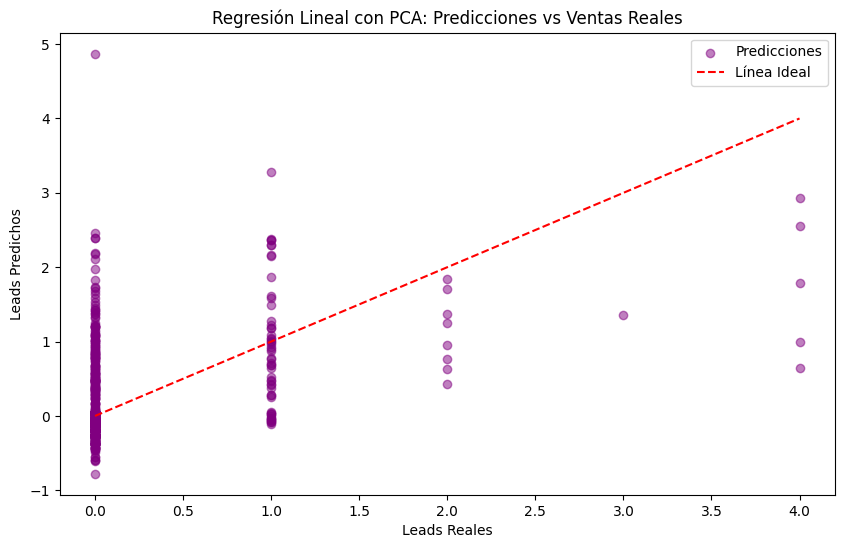

In [41]:
# --- Visualización del Modelo Elegido: Regresión Lineal con PCA ---
print("\n# Visualización del Modelo Elegido: Regresión Lineal con PCA y Ventas Reales")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pca_pred, alpha=0.5, label='Predicciones', color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
plt.title('Regresión Lineal con PCA: Predicciones vs Ventas Reales')
plt.xlabel('Leads Reales')
plt.ylabel('Leads Predichos')
plt.legend()
plt.show()

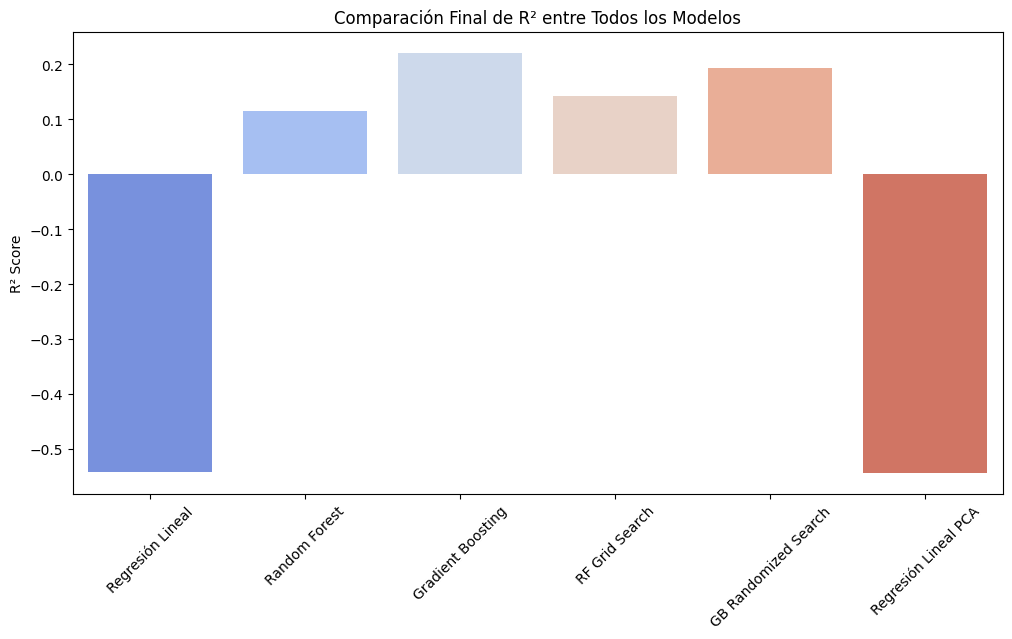

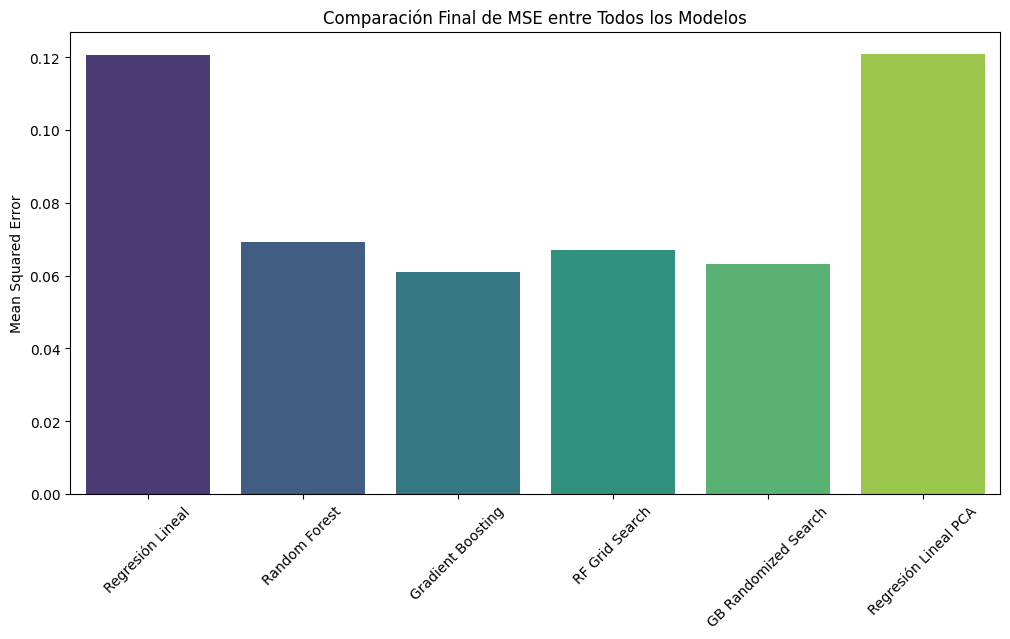

In [42]:
# Gráficos comparativos finales
plt.figure(figsize=(12, 6))
sns.barplot(x=list(models_performance.keys()), y=list(models_performance.values()), palette='coolwarm')
plt.title('Comparación Final de R² entre Todos los Modelos')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
mse_scores = [lr_mse, rf_mse, gb_mse, rf_grid_mse, gb_random_mse, lr_pca_mse]
sns.barplot(x=list(models_performance.keys()), y=mse_scores, palette='viridis')
plt.title('Comparación Final de MSE entre Todos los Modelos')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

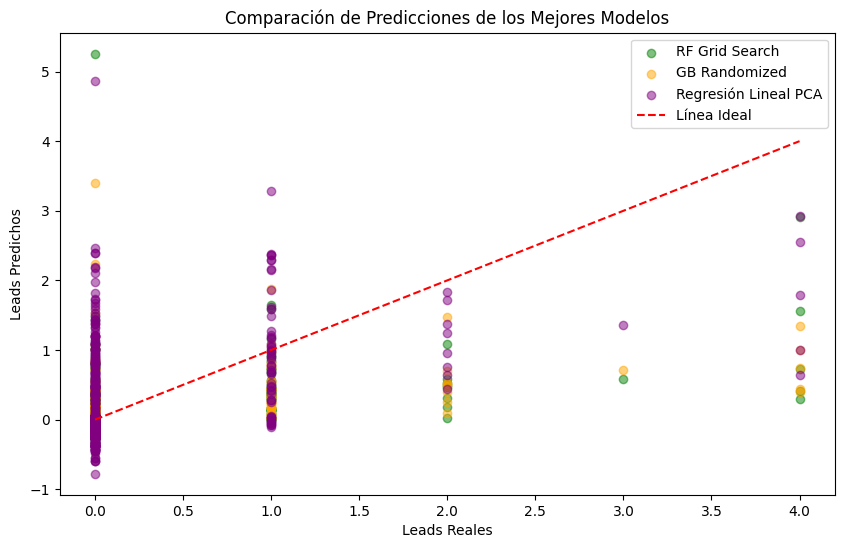

In [43]:
# Gráfico de dispersión combinado de los mejores modelos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred_grid, alpha=0.5, label='RF Grid Search', color='green')
plt.scatter(y_test, gb_pred_random, alpha=0.5, label='GB Randomized', color='orange')
plt.scatter(y_test, lr_pca_pred, alpha=0.5, label='Regresión Lineal PCA', color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
plt.title('Comparación de Predicciones de los Mejores Modelos')
plt.xlabel('Leads Reales')
plt.ylabel('Leads Predichos')
plt.legend()
plt.show()

## **Hipótesis y Conclusiones**

*Hipótesis 1*: Las casas generan más visitas y leads que apartamentos o terrenos.

**Conclusión:** El análisis confirmó parcialmente esta hipótesis. En el EDA, vimos que las casas tienen un promedio de visitas más alto que apartamentos o terrenos, como se observa en el gráfico de barras 'Visitas Promedio por Tipo de Propiedad'. Sin embargo, los leads no mostraron una diferencia tan clara entre tipos de propiedad, según el gráfico 'Leads Promedio por Tipo de Propiedad'. Esto sugiere que, aunque las casas atraen más atención inicial, la conversión a leads depende de otros factores.

*Hipótesis 2:* Los avisos 'Super Destacado' tienen más visitas y leads que los 'Simple'.

**Conclusión:** Esta hipótesis se validó completamente. Los boxplots de 'Visitas por Tipo de Destaque' y 'Leads por Tipo de Destaque' muestran que los avisos 'Super Destacado' generan significativamente más visitas y leads que los 'Simple'. Esto resalta la importancia de invertir en publicidad destacada para maximizar el impacto.

*Hipótesis 3:* Las propiedades en Funes tienen precios más altos que en Rosario.

**Conclusión:** La hipótesis 3 también se comprobó. El gráfico de barras 'Precio Promedio por Ciudad' indica que Funes tiene precios promedio más altos que Rosario, y el boxplot 'Distribución de Precios por Zona' refuerza que ciertas zonas de Funes, como Kentucky, son particularmente costosas. Esto señala a Funes como un mercado premium.

*Hipótesis 4:* Existe una correlación positiva entre impresiones/visitas y leads.

**Conclusión:** Esta hipótesis se confirmó parcialmente. Los gráficos de dispersión 'Impresiones vs Leads' y 'Visitas vs Leads' muestran una correlación positiva moderada entre visitas y leads, pero la relación con impresiones es más débil. Esto indica que las visitas son un mejor predictor de leads que las impresiones solas.

*Hipótesis 5*: Propiedades más grandes (Mt2/habitaciones) generan más interés.

**Conclusión:** La hipótesis 5 no se sostuvo del todo. El gráfico 'Mt2 Totales vs Leads' y el boxplot 'Visitas por Número de Habitaciones' muestran que no hay una relación fuerte entre el tamaño (metros cuadrados o habitaciones) y las visitas o leads. Otros factores, como la publicidad, parecen ser más determinantes.